<a href="https://colab.research.google.com/github/Andrie-wicaksono/Python-/blob/main/numpy%26matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochammad Andrie Wicaksono

NIM: 1101184347

Kelas: TT-43-G10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
  if frek in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif frek in range(1501,2001):
    Ca=46.3
    Cb=33.9   
  if tipe=='urban' :
    Cm=0
  elif tipe=='suburban' :
    Cm= -2*((np.log10((frek/28)**2))-5.4)
  elif tipe=='open' :
    Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else :
    Cm='tipe salah'
    
  ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
  Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
  return Lp

# Urban

In [ ]:
f=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [ ]:
LpUrban= cos(f,loc,tower,user,d)

In [ ]:
d_sort_urban = d[np.argsort(d)]
Urban_sort = LpUrban[np.argsort(d)]

# Open

In [ ]:
loc = 'open'
LpOpen = cos(f,loc,tower,user,d)
d_sort_open = d[np.argsort(d)]
Open_sort = LpOpen[np.argsort(d)]

# SubUrban

In [ ]:
loc = 'suburban'
LpSubUrban = cos(f,loc,tower,user,d)
d_Sort_SubUrban = d[np.argsort(d)]
Sub_Urban_Sort = LpSubUrban[np.argsort(d)]

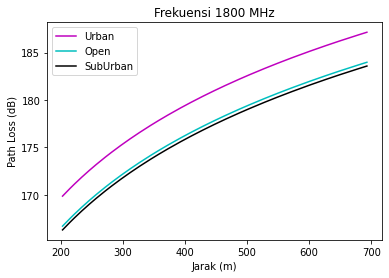

In [ ]:
plt.figure()
plt.plot(d_sort_urban,Urban_sort,'m', label='Urban')
plt.plot(d_sort_open,Open_sort,'c', label='Open')
plt.plot(d_Sort_SubUrban,Sub_Urban_Sort,'k', label='SubUrban')
plt.legend()
plt.title("Frekuensi 1800 MHz")
plt.xlabel("Jarak (m)")
plt.ylabel("Path Loss (dB)")
plt.show()

In [ ]:
f= 700 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)
LpA = cos(f,loc,tower,user,d)
sortA = d[np.argsort(d)]
urban1= LpA[np.argsort(d)]

f=900
LpB= cos(f,loc,tower,user,d)
sortB = d[np.argsort(d)]
urban2 = LpB[np.argsort(d)]

f=1800
LpC = cos(f,loc,tower,user,d)
sortC= d[np.argsort(d)]
urban3 = LpC[np.argsort(d)]

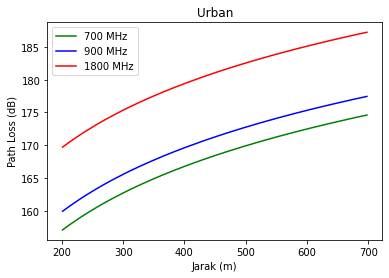

In [ ]:
plt.figure()
plt.plot(sortA,urban1,'g', label="700 MHz")
plt.plot(sortB,urban2,'b', label = "900 MHz")
plt.plot(sortC,urban3,"r", label="1800 MHz")
plt.legend()
plt.title("Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Path Loss (dB)")
plt.show()